(3L, 115L)
(3L, 46L)
(3L, 44L)
(3L, 66L)
(3L, 66L)
(3L, 27L)
(3L, 21L)
(3L, 44L)


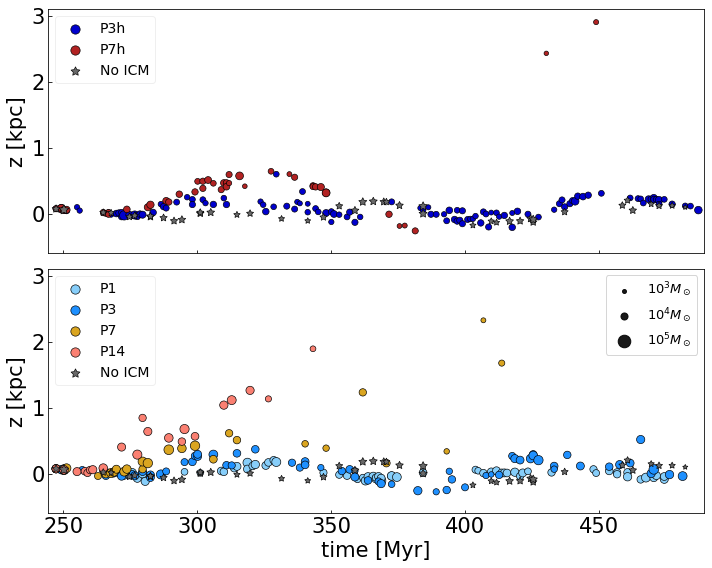

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy.constants as c
import astropy.units as u
import sys
from scipy.interpolate import spline
from matplotlib.ticker import MultipleLocator

sys.path.insert(0, '../')
from matplotlib.colors import LogNorm
from six.moves import cPickle as pickle

# In[7]:

import pyathena as pa


unit = pa.set_units(muH=1.4271)
#print (unit['density'].cgs / 1.4271 / c.m_p.cgs, unit['velocity'], unit['length'])

# other units can be easily obtained
#print (unit['mass'], unit['time'], unit['magnetic_field'])

Msun = unit['mass'].to('Msun').value
Myr=unit['time'].to('Myr').value

agebin = 10 # unit : Myr, 10 : H-alpha like, 40 : cluster lifetime

M_T_0 = []
M_T_1 = []
M_T_2 = []


simid_t = ('RPS_8pc_noICM_newacc','RPS_8pc_ICM0_newacc','RPS_8pc_ICM1_newacc','RPS_4pc_ICM1_newacc','RPS_8pc_ICM2_newacc','RPS_4pc_ICM2_newacc','RPS_8pc_ICM3_newacc')
#labell = ('No ICM',r'Very Weak','Weak','Weak_4pc','Strong','Strong_4pc',r'Very Strong')
labell = ('No ICM','P1','P3','P3h', 'P7','P7h','P14',)  # r'No ICM',
#C = ('k', 'salmon', 'mediumblue','deepskyblue' ,'darkgreen','lime', 'magenta','darkmagenta','goldenrod','royalblue','crimson') # 'plum','orchid','purple'
C2 = ('dimgray', 'lightskyblue', 'dodgerblue','mediumblue' ,'goldenrod','firebrick','salmon','crimson', 'firebrick')
C = ( 'dodgerblue','mediumblue','salmon','crimson','dimgray', 'firebrick')
#C = ('k', 'salmon', 'deepskyblue', 'green', 'magenta','goldenrod','royalblue','crimson')
M = ((5,1),'o','o','o','o','o','o')
S = ('-','-','-')
L = (1.5,1.5,1.5)
a = (0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8)
a = (1,1,1,1,1,1,1,1,1,1,1)

# overplot Starformation rate of three different simulations
leg = []
norm = 2
#fig,ax = plt.subplots(figsize=(10,5))
k=0


fig,ax=plt.subplots(2,1,figsize=(10,8))

ax = ax.ravel()
model = (3,5,0)
lm = len(model)
for j in model:
    data=np.genfromtxt('SF_height_%s.txt' % labell[j]) # t, z, m
    print data.shape
    z = data[1,:]
    m = data[2,:]
    t = data[0,:]
    
    
    ax[0].scatter(t, z, s=m, c=C2[j], edgecolors='k', linewidths=0.65, alpha=a[j], marker=M[j])
    ax[0].scatter([], [], marker=M[j], s=np.sqrt(3e4)/norm,c=C2[j],label=labell[j],edgecolors='k',linewidths=0.65,alpha=a[k])
    ax[0].tick_params(which='major', direction='in')
    ax[0].set_xlim(250*Myr,500*Myr)
    ax[0].set_ylim(-0.6,3.1)
    ax[0].set_xticklabels([])
    ax[0].set_yticks([0,1,2,3])
    ax[0].set_yticklabels([0,1,2,3],fontsize=21)
    #ax[0].set_xlabel('time [Myr]',fontsize=21)
    ax[0].set_ylabel('z [kpc]',fontsize=21)

    k = k+1
    
ax[0].legend(loc='upper left',fontsize=14,framealpha=0.3)


model = (1,2,4,6,0)
lm = len(model)
for j in model:
    data=np.genfromtxt('SF_height_%s.txt' % labell[j]) # t, z, m
    print data.shape
    z = data[1,:]
    m = data[2,:]
    t = data[0,:]
    
    ax[1].scatter(t, z, s=m, c=C2[j], edgecolors='k', linewidths=0.65, alpha=a[j], marker=M[j])
    ax[1].scatter([], [], marker=M[j], s=np.sqrt(3e4)/norm,c=C2[j],label=labell[j],edgecolors='k',linewidths=0.65,alpha=a[k])
    ax[1].tick_params(which='major', direction='in')
    ax[1].set_xlim(250*Myr,500*Myr)
    ax[1].set_ylim(-0.6,3.1)
    ax[1].set_xticks([250,300,350,400,450])
    ax[1].set_xticklabels([250,300,350,400,450],fontsize=21)
    ax[1].set_yticks([0,1,2,3])
    ax[1].set_yticklabels([0,1,2,3],fontsize=21)
    ax[1].set_xlabel('time [Myr]',fontsize=21)
    ax[1].set_ylabel('z [kpc]',fontsize=21)
    k = k+1
    #plt.legend(loc='upper left',fontsize=14,framealpha=0.1)

starlabels=(r'$10^3 M_\odot$',r'$10^4 M_\odot$',r'$10^5 M_\odot$')
s1 = plt.scatter([], [], c='k', alpha=0.9, s=np.sqrt(1e3)/norm,label=starlabels[0])
s2 = plt.scatter([], [], c='k', alpha=0.9, s=np.sqrt(1e4)/norm,label=starlabels[1])
s3 = plt.scatter([], [], c='k', alpha=0.9, s=np.sqrt(1e5)/norm,label=starlabels[2])
h, l =plt.gca().get_legend_handles_labels()
legend1=plt.legend(h[0:lm],l[0:lm],loc='upper left',fontsize=14,framealpha=0.3)
plt.legend(h[lm:],l[lm:],loc='upper right',fontsize=13)
plt.gca().add_artist(legend1)
plt.tight_layout()
#plt.savefig('D:/yeongu/plots/paperplot/new/SFR_height_comb_low.png', dpi=100)
#plt.savefig('D:/yeongu/plots/paperplot/new/SFR_height_comb.png', dpi=300)
#plt.savefig('D:/yeongu/plots/paperplot/new/SFR_height_comb.eps', format='eps',dpi=300,rasterized=True)
plt.show()


